In [1]:
import numpy as np
from scipy.stats import norm

%matplotlib notebook
import matplotlib.pyplot as plt

from galofeats import ScatterEstimator

<IPython.core.display.Javascript object>


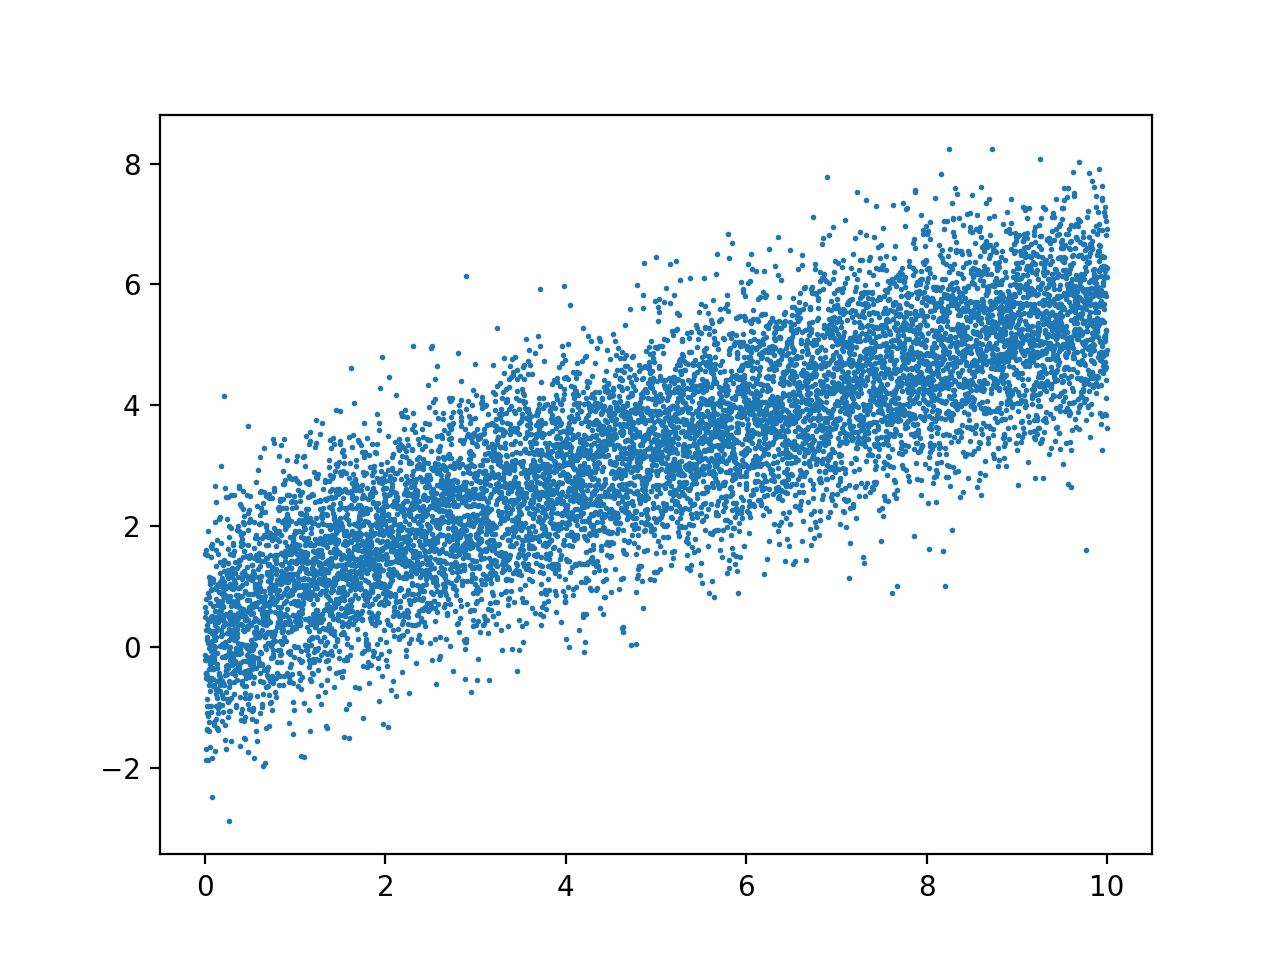

In [2]:
# Specify the random seed
np.random.seed(42)

# Start off by creating a fiducial data set with scatter of std=1
def fiducial_relation(x):
    return x**0.75
x = np.linspace(0, 10, 10000)

y = fiducial_relation(x) + np.random.normal(size=x.size)

plt.figure()
plt.scatter(x, y, s=1)
plt.show()

<IPython.core.display.Javascript object>


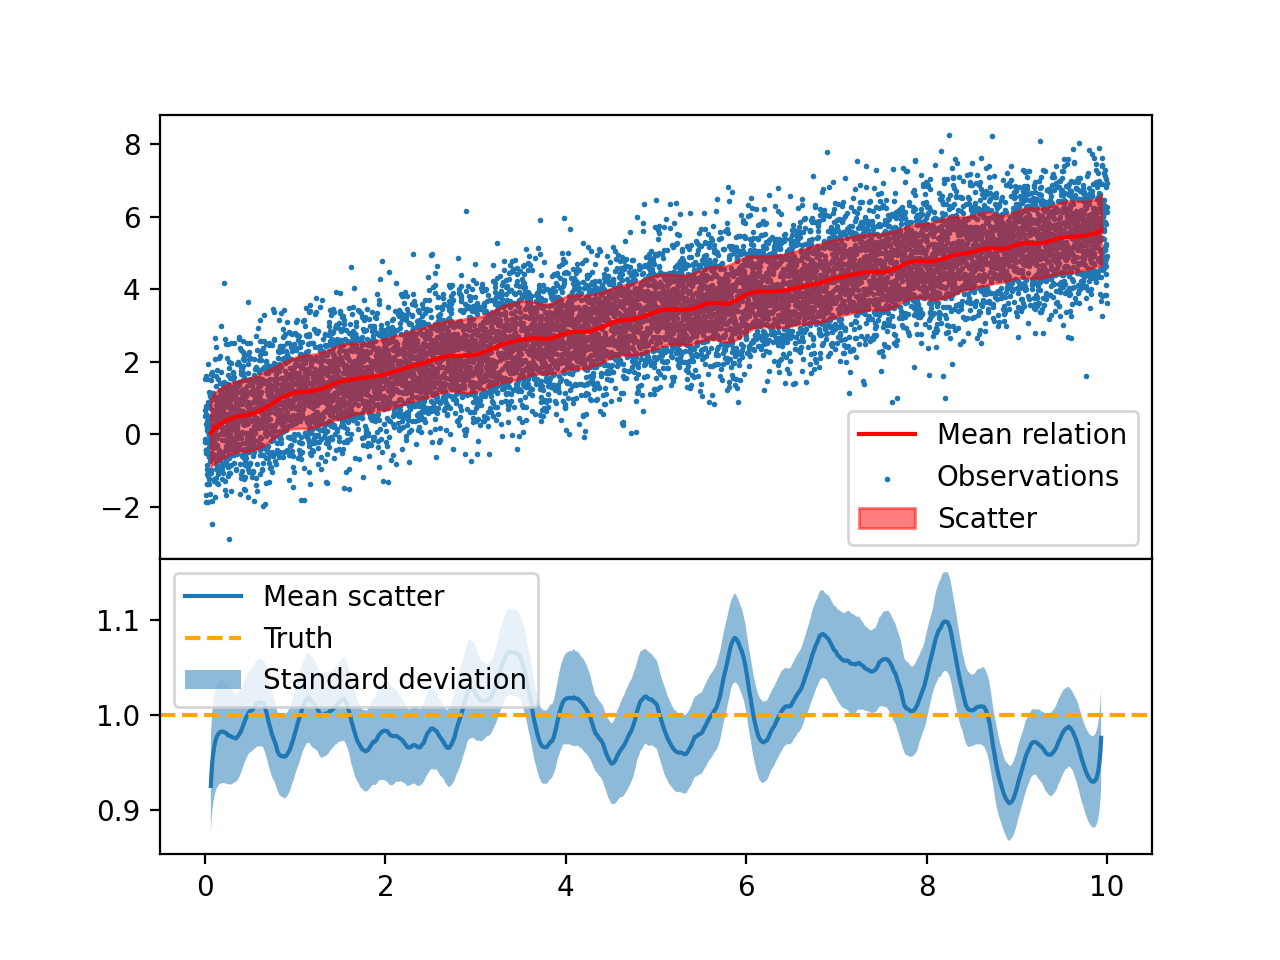

In [3]:
# Initialise the scatter estimator and plot the outcome
bin_width = 0.25
model = ScatterEstimator(x, y, bin_width=bin_width)

t = np.linspace(0, 10, 500)
# Apply a gentle level of smoothing
X = model(t, **{'window_length': 25, 'polyorder': 3})


fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, gridspec_kw={'height_ratios': [1.5, 1]})
fig.subplots_adjust(hspace=0)

axes[0].scatter(model.x, model.y, s=1, label='Observations')
axes[0].plot(X['x'], X['y'], c='red', label='Mean relation')
axes[0].fill_between(X['x'], X['y'] - X['scatter'], X['y'] + X['scatter'], color='red',
                     alpha=0.5, label='Scatter')
axes[0].legend()

axes[1].plot(X['x'], X['scatter'], label='Mean scatter')
axes[1].fill_between(X['x'], X['scatter'] - X['scatter_std'], X['scatter'] + X['scatter_std'],
                     alpha=0.5, label='Standard deviation')
axes[1].axhline(1, label='Truth', color='orange', ls='--')
axes[1].legend()

fig.show()

<IPython.core.display.Javascript object>


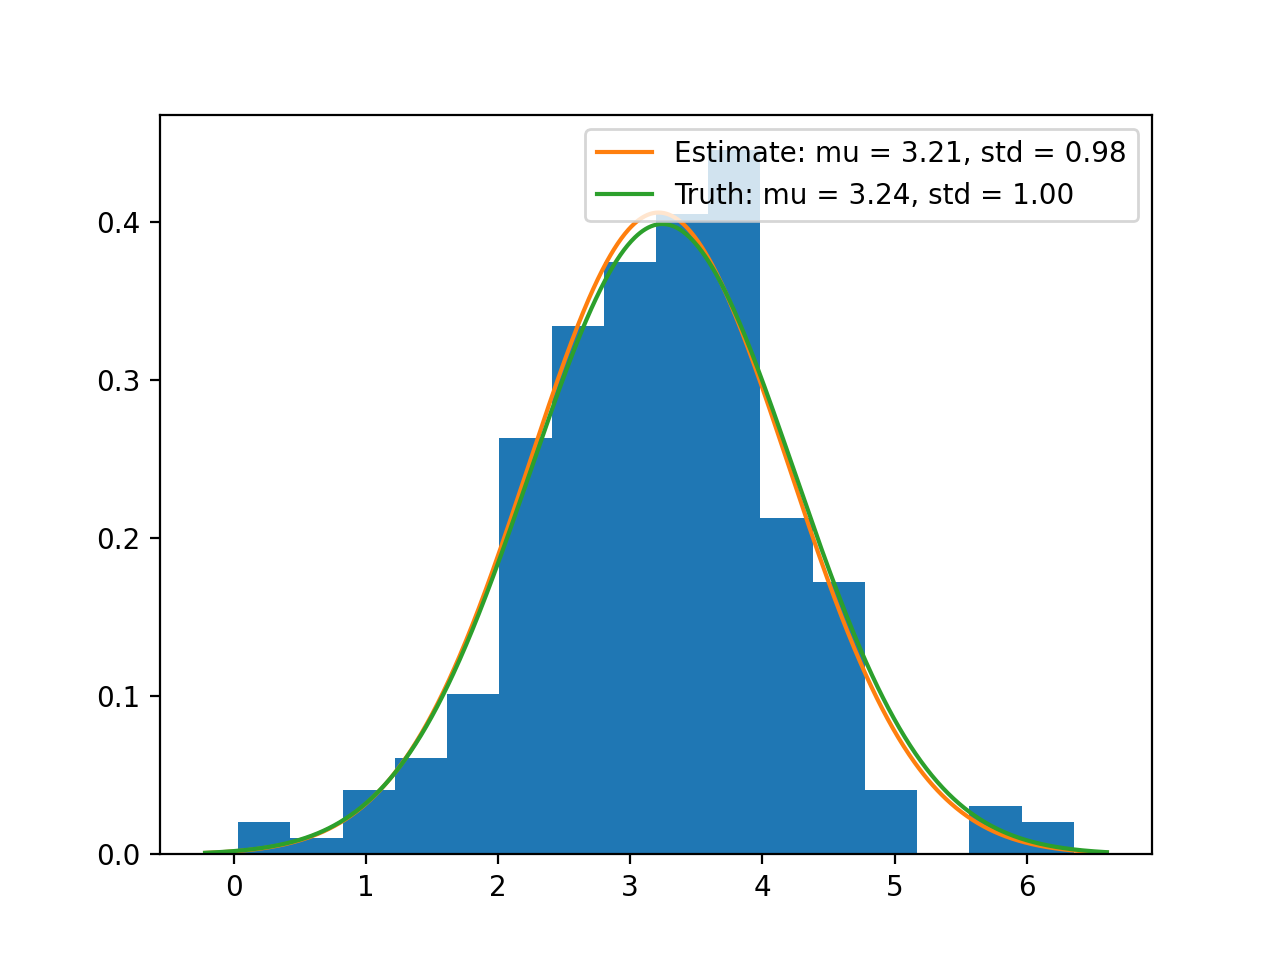

In [4]:
# Zoom at a specific point phi
phi = 4.8
mask = np.logical_and(x > phi - bin_width / 2,
                      x < phi + bin_width / 2)


plt.figure()
plt.hist(y[mask], bins='auto', density=1)

t = np.linspace(y[mask].min()-bin_width, y[mask].max()+bin_width, 1000)

mu1 = np.mean(y[mask])
std1 = np.std(y[mask])
plt.plot(t, norm(loc=mu1, scale=std1).pdf(t),
         label='Estimate: mu = {:.2f}, std = {:.2f}'.format(mu1, std1))

mu2 = fiducial_relation(phi)
plt.plot(t, norm(loc=fiducial_relation(phi), scale=1).pdf(t),
         label='Truth: mu = {:.2f}, std = {:.2f}'.format(mu2, 1))

plt.legend()
plt.show()